Analyzing amazon data science books dataset

- Author: Pawan Kumar Shrestha
  
- Date: 29 December 2022

Dataset:

This project uses the Data Science books dataset available on Kaggle https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books

To-do List:

1. EDA: Do more expensive books have better review?
   
2. EDA: Do longer book pages have higher pages?

3. What are the best Python and Machine Learning books?

4. Cluster analysis of book names using TF-IDF and K-means

In [1]:
pip install plotly==5.11.0

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('amazon-ds-book.csv')
df

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,The Book of R: A First Course in Programming a...,[Tilman M. Davies],28.33,832.0,4.6,327,0.74,0.16,0.06,0.02,0.03,7 x 1.44 x 9.25 inches,2.95 pounds,English,No Starch Press; 1st edition (July 16 2016),978-1593276515,/Book-First-Course-Programming-Statistics/dp/1...,https://www.amazon.com/Book-First-Course-Progr...
942,Basic Business Statistics: A Casebook (Textboo...,"[Dean P. Foster,Robert A. Stine et al.]",59.23,260.0,4.3,6,0.70,0.11,0.19,0.00,0.00,8.27 x 0.6 x 11.02 inches,2.93 pounds,English,Springer; 1st ed. 1998. 4th printing 2001 edit...,978-0387983547,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
943,Elementary Statistics: Picturing the World,"[Ron Larson,Betsy Farber]",129.99,704.0,4.5,1025,0.72,0.14,0.07,0.01,0.05,8.5 x 1.1 x 11 inches,3.48 pounds,English,Pearson; 7th edition (January 3 2018),978-0134683416,/Elementary-Statistics-Picturing-World-7th/dp/...,https://www.amazon.com/Elementary-Statistics-P...
944,Making Sense of Statistics: A Conceptual Overview,"[Fred Pyrczak,Deborah M. Oh]",47.76,252.0,4.6,145,0.78,0.13,0.04,0.02,0.04,8.5 x 0.57 x 11 inches,1.12 pounds,English,Routledge; 7th edition (June 18 2018),978-1138894761,/Making-Sense-Statistics-Fred-Pyrczak/dp/11388...,https://www.amazon.com/Making-Sense-Statistics...


Exploratory Data Analysis

Price vs Reviews

In [8]:
px.scatter(df, x = 'price', y = 'avg_reviews', size = 'n_reviews')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'price=%{x}<br>avg_reviews=%{y}<br>n_reviews=%{marker.size}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa',
                         'size': array([ 184,  599,   33, ..., 1025,  145,  787], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 18.9075,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 24.49,  26.  ,  50.76, ..., 129.99,  47.76,  15.55]),
              'xaxis': 'x',
              'y': array([4.6, 4.5, 5. , ..., 4.5, 4.6, 4.5]),
              'yaxis': 'y'}],
    'layout': {'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'price'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'avg_reviews'}}}
})

Price vs Book Length

In [9]:
px.scatter(df, x = 'price', y = 'pages', size = 'n_reviews')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'price=%{x}<br>pages=%{y}<br>n_reviews=%{marker.size}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa',
                         'size': array([ 184,  599,   33, ..., 1025,  145,  787], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 18.9075,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 24.49,  26.  ,  50.76, ..., 129.99,  47.76,  15.55]),
              'xaxis': 'x',
              'y': array([272., 301., 446., ..., 704., 252., 464.]),
              'yaxis': 'y'}],
    'layout': {'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'price'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'pages'}}}
})

Best Python Books

In [10]:
# select books based on title containing 'Python'
python_books = df[df['title'].str.contains('Python')]

# Python books with most reviews and highest average rating
best_python_books = python_books.nlargest(7, ['n_reviews', 'avg_reviews'])
best_python_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
104,Python Crash Course 2nd Edition: A Hands-On Pr...,[Eric Matthes],21.49,544.0,4.7,7425,0.81,0.13,0.04,0.01,0.01,7 x 1.2 x 9.25 inches,2.3 pounds,English,No Starch Press; 2nd edition (May 3 2019),978-1593279288,/Python-Crash-Course-2nd-Edition/dp/1593279280...,https://www.amazon.com/Python-Crash-Course-2nd...
368,Python: - The Bible- 3 Manuscripts in 1 book: ...,[Maurice J. Thompson],27.97,375.0,4.3,4033,0.64,0.16,0.10,0.04,0.06,6 x 0.85 x 9 inches,1.11 pounds,English,Independently published (April 28 2018),978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
819,Python: For Beginners: A Crash Course Guide To...,[Timothy C. Needham],17.97,135.0,4.3,3034,0.66,0.16,0.10,0.03,0.05,6 x 0.31 x 9 inches,6.7 ounces,English,Independently published (September 21 2017),978-0679722014,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
827,Automate the Boring Stuff with Python 2nd Edit...,[Al Sweigart],26.49,592.0,4.7,2538,0.82,0.12,0.03,0.01,0.01,7 x 1.31 x 9.31 inches,2.48 pounds,English,No Starch Press; 2nd edition (November 12 2019),978-1593279929,/Automate-Boring-Stuff-Python-2nd/dp/159327992...,https://www.amazon.com/Automate-Boring-Stuff-P...
320,Python for Everybody: Exploring Data in Python 3,"[Dr. Charles Russell Severance,Sue Blumenberg ...",9.99,247.0,4.6,2467,0.76,0.15,0.05,0.02,0.02,7 x 0.56 x 10 inches,15.2 ounces,English,CreateSpace Independent Publishing Platform (A...,978-1530051120,/Python-Everybody-Exploring-Data/dp/1530051126...,https://www.amazon.com/Python-Everybody-Explor...
218,Python for Data Analysis: Data Wrangling with ...,[William McKinney],53.99,547.0,4.6,1631,0.76,0.15,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,2.08 pounds,English,OReilly Media; 2nd edition (November 14 2017),978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
428,Deep Learning with Python,[Francois Chollet],32.49,384.0,4.6,1349,0.76,0.13,0.04,0.02,0.04,7.38 x 0.8 x 9.25 inches,1.59 pounds,English,Manning; 1st edition (December 22 2017),978-1617294433,/Deep-Learning-Python-Francois-Chollet/dp/1617...,https://www.amazon.com/Deep-Learning-Python-Fr...


Best Machine Learning Books

In [11]:
# select books based on title containing 'Machine Learning'
ml_books = df[df['title'].str.contains('Machine Learning')]

# ML books with most reviews and highest average rating
best_ml_books = ml_books.nlargest(7, ['n_reviews', 'avg_reviews'])
best_ml_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
400,Deep Learning (Adaptive Computation and Machin...,NaN,54.25,800.0,4.3,1862,0.73,0.10,0.05,0.04,0.08,9.1 x 7.2 x 1.1 inches,2.54 pounds,English,The MIT Press; Illustrated edition (November 1...,978-0262035613,/Deep-Learning-Adaptive-Computation-Machine/dp...,https://www.amazon.com/Deep-Learning-Adaptive-...
200,The Hundred-Page Machine Learning Book,[Andriy Burkov],31.99,160.0,4.6,816,0.81,0.10,0.04,0.02,0.03,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,Andriy Burkov (January 13 2019),978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...
571,Pattern Recognition and Machine Learning (Info...,[Christopher M. Bishop],76.10,738.0,4.6,663,0.76,0.13,0.06,0.03,0.02,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,Springer (August 17 2006),978-0387310732,/sspa/click?ie=UTF8&spc=MTo1MjMzODUwNDM1MTQ1Nj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
215,Mathematics for Machine Learning,NaN,46.54,398.0,4.7,580,0.80,0.13,0.03,0.02,0.02,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...
559,Introduction to Machine Learning with Python: ...,NaN,45.00,398.0,4.5,565,0.76,0.14,0.03,0.03,0.04,7 x 0.82 x 9.19 inches,1.3 pounds,English,OReilly Media; 1st edition (November 15 2016),978-1449369415,/Introduction-Machine-Learning-Python-Scientis...,https://www.amazon.com/Introduction-Machine-Le...
567,Advances in Financial Machine Learning,[Marcos Lopez de Prado],40.49,400.0,4.5,514,0.76,0.09,0.07,0.03,0.05,6.1 x 1.1 x 9 inches,1.6 pounds,English,Wiley; 1st edition (February 21 2018),978-1119482086,/Advances-Financial-Machine-Learning-Marcos/dp...,https://www.amazon.com/Advances-Financial-Mach...
608,Reinforcement Learning second edition: An Intr...,NaN,66.44,552.0,4.6,460,0.82,0.08,0.02,0.02,0.06,7.25 x 1.48 x 9.31 inches,2.6 pounds,English,Bradford Books; second edition (November 13 2018),978-0262039246,/Reinforcement-Learning-Introduction-Adaptive-...,https://www.amazon.com/Reinforcement-Learning-...


Clustering book titles

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(df['title'])

In [14]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,001,10,10 machine,100,100 essential,100 recipes,100 solved,101,101 data,1098,...,youll likely,young,young children,youtube,youâ,youâ new,zed,zed shaws,²s,²s statistics
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.cluster import KMeans

sum_of_squared_distance = []

# Kmeans clustering
K = range(2, 10)
for row in K:
    km = KMeans(n_clusters=row, max_iter=600, n_init=10)
    km.fit(X)
    sum_of_squared_distance.append(km.inertia_)

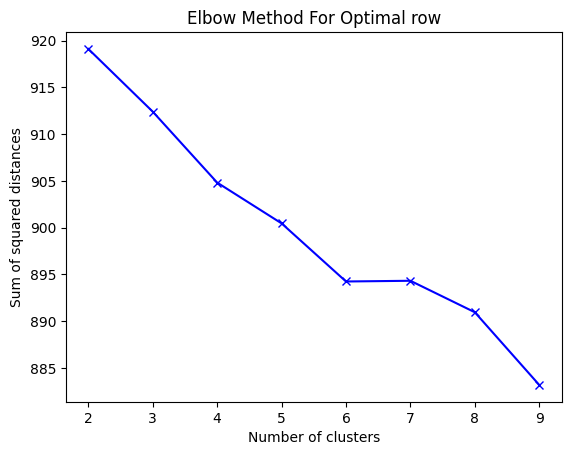

In [16]:
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal row')
plt.show()

In [17]:
# get clusters
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# get prediction/ labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df['title'],labels)), columns=['title', 'cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
449              Deep Reinforcement Learning in Action        0
502  Machine and Deep Learning in Oncology Medical ...        0
503  Deep Learning for Physical Scientists: Acceler...        0
504                   Deep Learning and the Game of Go        0
505  Automated Machine Learning with AutoKeras: Dee...        0
..                                                 ...      ...
291                   Exploratory Data Analysis with R        5
292  Statistics and Data Analysis for Nursing Research        5
293  An Introduction to Data Analysis: Quantitative...        5
277  Experimental Design and Practical Data Analysi...        5
282  Data Analysis: An Introduction (Quantitative A...        5

[946 rows x 2 columns]


In [20]:
pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp310-cp310-win_amd64.whl (153 kB)
Note: you may need to restart the kernel to use updated packages.


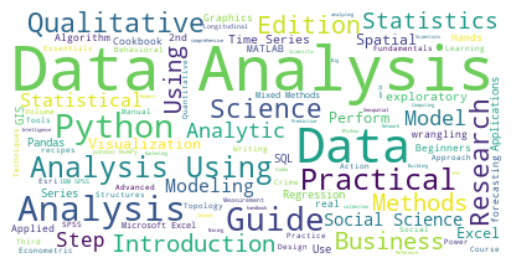

In [22]:
# create word clouds for clustering
from wordcloud import WordCloud

for row in range(true_k):
    text = book_cl[book_cl.cluster == row]['title'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)

plt.show()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

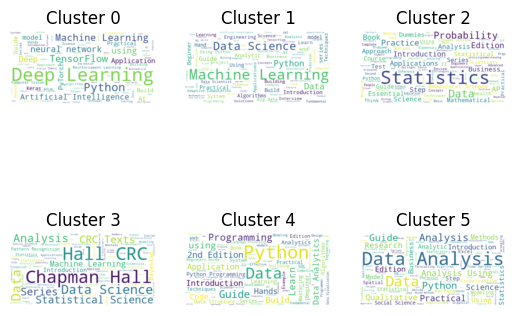

In [23]:
# create word clouds for clustering
from wordcloud import WordCloud

for row in range(true_k):
    text = book_cl[book_cl.cluster == row]['title'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)

    # create subplot
    plt.subplot(2, 3, row+1).set_title('Cluster ' + str(row))
    plt.plot()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
plt.show()

In [31]:
# prediction on unseen data

test = vectorizer.transform(['data analysis with python'])
model.predict(test)[0]

5